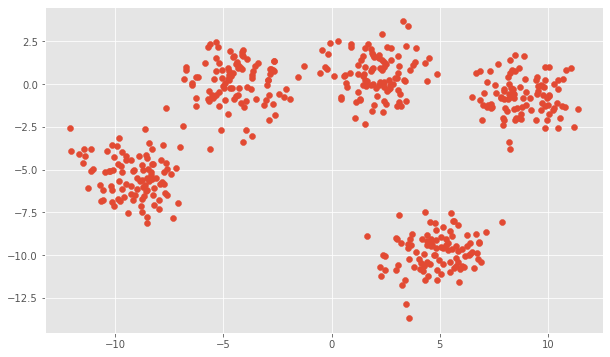

In [177]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')
# Create color maps
from matplotlib.colors import ListedColormap
cmap = ListedColormap(["#e41a1c","#984ea3","#a65628","#377eb8","#ffff33","#4daf4a","#ff7f00"])

n_samples = 500
random_state = 170
X, y = make_blobs(n_samples=n_samples, centers=5, random_state=random_state, cluster_std=1.2)

plt.scatter(X[:, 0], X[:, 1],  marker="o");

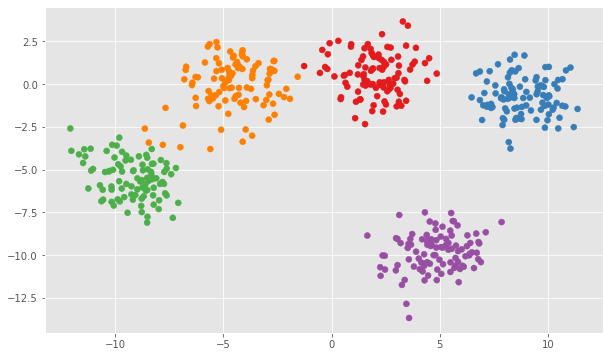

In [178]:
model = KMeans(n_clusters=5, n_init=1, init='random', max_iter=1)
y_pred = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred,  marker="o", cmap=cmap);

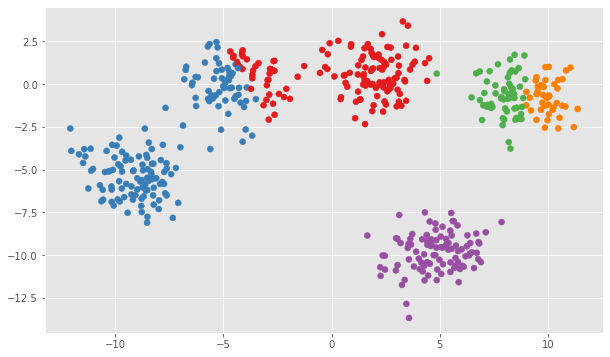

In [179]:
y_pred = KMeans(n_clusters=5, n_init=1, init='random', max_iter=5).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred,  marker="o", cmap=cmap);

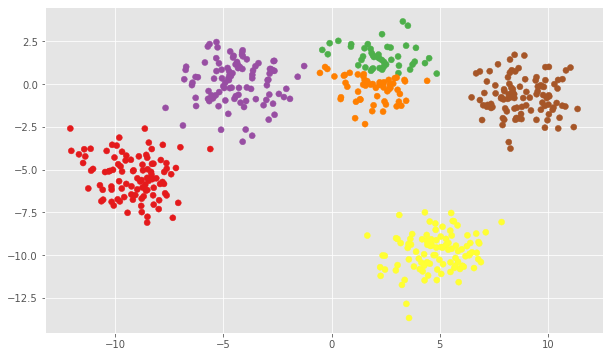

In [180]:
km=KMeans(n_clusters=6, n_init=1, init='random', max_iter=5)
y_pred = km.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred,  marker="o", cmap=cmap);

In [181]:
km.cluster_centers_

array([[-9.12921504, -5.41486134],
       [-4.40384009,  0.09705347],
       [ 8.84206298, -0.72510888],
       [ 4.83112994, -9.819084  ],
       [ 2.28358197,  1.6463253 ],
       [ 1.89285721, -0.27499639]])

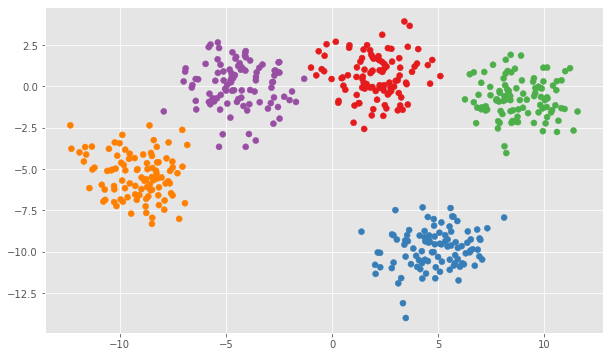

In [182]:
n_samples = 500
random_state = 170
X, y = make_blobs(n_samples=n_samples, centers=5, random_state=random_state, cluster_std=1.3)

y_pred = KMeans(n_clusters=5, n_init=1, init='random', max_iter=100,random_state=71).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred,  marker="o", cmap=cmap);

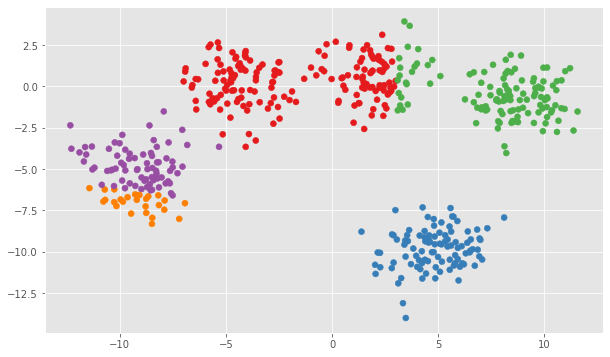

In [183]:
y_pred = KMeans(n_clusters=5, n_init=1, init='random', max_iter=1,random_state=71).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred,  marker="o", cmap=cmap);

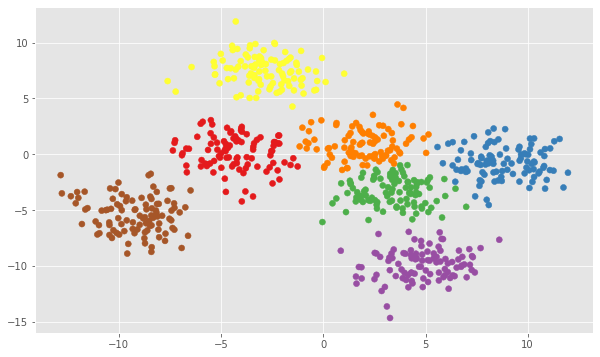

In [184]:
n_samples = 700
random_state = 170
X, y = make_blobs(n_samples=n_samples, centers=7, random_state=random_state, cluster_std=1.5)

km = KMeans(n_clusters=7, n_init=3, init='random', max_iter=10)
y_pred = km.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred,  marker="o", cmap=cmap);

In [185]:
km.cluster_centers_

array([[-4.29930102,  0.13781117],
       [ 4.81265645, -9.88226794],
       [-9.20822248, -5.42566187],
       [ 8.81856592, -0.74861491],
       [-2.88332476,  7.45579995],
       [ 3.36057412, -3.3858567 ],
       [ 2.00675147,  0.87518983]])

# This is our project

In [186]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

import sklearn
from sklearn import cluster

from sklearn import metrics, preprocessing, neighbors, cluster
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import silhouette_samples, silhouette_score

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')
# Create color maps
from matplotlib.colors import ListedColormap
cmap = ListedColormap(["#e41a1c","#984ea3","#a65628","#377eb8","#ffff33","#4daf4a","#ff7f00"])

df = pd.read_csv("Amazon Items Cleaned.csv")
df

,Name,Brand,Rating,BestSeller,AmazonChoice,Comments,Price,Stars
0,"NOCO NUSB211NA 10W USB Power Adapter, 2.1A 5V ...",NOCO,3869.0,0,0,28.0,13.95,4.7
1,Amazfit Band 5 Activity Fitness Tracker with A...,Amazfit,21158.0,0,0,1000.0,29.88,4.1
2,Amazon Basics Universal Travel Case Organizer ...,AmazonBasics,16242.0,0,1,277.0,14.44,4.6
3,"Amazon Glow with Tangram Bits | Learn, Play, R...",Amazon,215.0,0,1,31.0,329.98,4.4
4,"Echo Show 5 (2nd Gen, 2021 release) - Deep Sea...",Amazon,928.0,0,1,21.0,114.98,4.7
...,...,...,...,...,...,...,...,...
1631,American Eagle Gift Card,American Eagle,5999.0,0,0,4.0,25.00,4.9
1632,Amazon.com Gift Cards - As a Bookmark,Amazon,3950.0,0,0,15.0,100.00,4.9
1633,Amazon.com Gift Card in a Gift Tag,Amazon,7520.0,0,0,12.0,10.00,4.9
1634,"Amazon.com $10 Gift Cards, Pack of 3 (Holiday ...",Amazon,3014.0,0,0,3.0,30.00,4.9


In [187]:
def transfer_str_to_numeric_vals(dataset,str_col,id_col_to_remove):
    DF = dataset.copy()
    for column in DF :
        DF[str_col] = pd.factorize(DF[str_col])[0] + 1
    DF.pop(id_col_to_remove)
    return DF

num_dataset = transfer_str_to_numeric_vals(df, 'Name', 'Brand')
num_dataset

,Name,Rating,BestSeller,AmazonChoice,Comments,Price,Stars
0,1,3869.0,0,0,28.0,13.95,4.7
1,2,21158.0,0,0,1000.0,29.88,4.1
2,3,16242.0,0,1,277.0,14.44,4.6
3,4,215.0,0,1,31.0,329.98,4.4
4,5,928.0,0,1,21.0,114.98,4.7
...,...,...,...,...,...,...,...
1631,660,5999.0,0,0,4.0,25.00,4.9
1632,1439,3950.0,0,0,15.0,100.00,4.9
1633,1440,7520.0,0,0,12.0,10.00,4.9
1634,1441,3014.0,0,0,3.0,30.00,4.9


In [188]:
def scale_dataset(dataset):
    scaler = StandardScaler()
    
    DFScaled = scaler.fit_transform(dataset)
    
    return DFScaled

dfScaled = scale_dataset(num_dataset)
dfScaled

array([[-1.59221768, -0.12708992, -0.17009062, ..., -0.27852636,
        -0.33342472,  0.74935901],
       [-1.5898465 ,  0.53877864, -0.17009062, ...,  5.62962395,
        -0.2580302 , -1.19299854],
       [-1.58747532,  0.34944381, -0.17009062, ...,  1.23498128,
        -0.33110562,  0.42563275],
       ...,
       [ 1.81990883,  0.0135247 , -0.17009062, ..., -0.37577987,
        -0.35211953,  1.39681153],
       [ 1.82228001, -0.16001939, -0.17009062, ..., -0.43048496,
        -0.25746226,  1.39681153],
       [ 1.82465119,  0.40582831, -0.17009062, ..., -0.24813464,
        -0.26692798,  0.42563275]])

In [189]:
def perform_k_means(dataset, num_clusters, init_val, n_init_val, rand_state):
    model = KMeans(n_clusters = num_clusters, n_init = n_init_val, init = init_val, random_state = rand_state)
    predicted_vals = model.fit_predict(dataset)
        
    return model, predicted_vals

num_clusters = 3
init_val ='k-means++'
n_init_val = 5
rand_state = 42

kmeans_model, predicted_vals = perform_k_means(dfScaled, num_clusters, init_val, n_init_val, rand_state)
print(kmeans_model)
print(predicted_vals)

KMeans(n_clusters=3, n_init=5, random_state=42)
[0 0 1 ... 0 0 0]


In [190]:
def perform_hierarchical_clustering(dataset, num_clusters, linkage_val):
    
    agg_cluster_model = AgglomerativeClustering(n_clusters = num_clusters, linkage = linkage_val)
    y_pred = agg_cluster_model.fit_predict(dataset)
    
    return agg_cluster_model, y_pred

linkage_val = 'single'
hierarchical_model, predicted_vals = perform_hierarchical_clustering(dfScaled, num_clusters, linkage_val)
print(hierarchical_model)
print(predicted_vals)

AgglomerativeClustering(linkage='single', n_clusters=3)
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
